In [1]:
import sklearn.datasets as datasets
import pandas as pd
def get_iris_data_frame():
        iris_data = datasets.load_iris()
        df_data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
        type_dict = {i:t for i, t in enumerate(iris_data.target_names)}
        df_target = pd.DataFrame(iris_data.target, columns=['Type'])
        df_target.loc[:, 'Type'] = df_target['Type'].map(type_dict)
        df_iris = pd.concat([df_data, df_target], axis=1)
        return df_iris

In [2]:
import numpy as np
import tensorflow as tf

num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print ('score:', kmeans.score(input_fn))
print ('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print ('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpeycv9o9h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variab

INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...
INFO:tensorflow:Saving checkpoints for 5 into /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpeycv9o9h/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...
INFO:tensorflow:loss = 2841601.2, step = 6
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7...
INFO:tensorflow:Saving checkpoints for 7 into /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpeycv9o9h/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7...
INFO:tensorflow:Loss for final step: 2841601.2.
delta: [[  0.          0.       ]
 [  2.2731323 -11.317291 ]
 [  0.          0.       ]
 [  0.          0.       ]
 [-18.013123    4.8942184]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-05T17:55:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9w/lpl

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 15...
INFO:tensorflow:Loss for final step: 2822136.8.
delta: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-05T17:55:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpeycv9o9h/model.ckpt-15
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.11219s
INFO:tensorflow:Finished evaluation at 2021-07-05-17:55:43
INFO:tensorflow:Saving dict for global step 15: global_step = 15, loss = 2822136.8, score = 2822136.8
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15: /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpeycv9o9h/model.ckpt-15
score: 2822136.8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done cal

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.datasets as datasets

df_iris = get_iris_data_frame()
points = df_iris.iloc[:, 0:4].values

num_points, dimensions = points.shape


def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 3
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print ('score:', kmeans.score(input_fn))
print ('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
#for i, point in enumerate(points):
#  cluster_index = cluster_indices[i]
#  center = cluster_centers[cluster_index]
#  print ('point:', point, 'is in cluster', cluster_index, 'centered at', center)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:Saving dict for global step 7: global_step = 7, loss = 78.85162, score = 78.85162
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7: /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd/model.ckpt-7
score: 78.85162
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd/model.ckpt-7
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7...
INFO:tensorflow:Saving checkpoints for 7 into /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7...
INFO:tensorflow:loss = 78.85162, step = 8
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9...
INFO:t

INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 17...
INFO:tensorflow:Loss for final step: 78.85162.
delta: [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-05T17:55:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd/model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.11626s
INFO:tensorflow:Finished evaluation at 2021-07-05-17:55:51
INFO:tensorflow:Saving dict for global step 17: global_step = 17, loss = 78.85162, score = 78.85162
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17: /var/folders/9w/lplyvlz97911r_7_zf1bvknm0000gn/T/tmpqhasplmd/model.ckpt-17
score: 78.85162
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling

In [4]:
df_iris ['cluster_id'] = np.array(cluster_indices)
df_iris['cluster_center'] = df_iris['cluster_id'].apply(lambda x:cluster_centers[x])

In [5]:
df_iris.groupby(['cluster_id']).agg({'cluster_id':['count']})

,cluster_id
,count
cluster_id,
0,38
1,62
2,50


In [6]:
df_iris['cluster_center'].values

array([array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.24599996], dtype=float32),
       array([5.0059996 , 3.4280002 , 1.462     , 0.

In [7]:
df_iris['cluster_center'].values.shape

(150,)

In [8]:
points

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
points.shape

(150, 4)

In [65]:
def plot_decision_boundary(X, y, model):
    from mlxtend.plotting import plot_decision_regions
    class ModelWrapper(object):

        def __init__(self, model):
            self.model = model

        def predict(self, X):
            y_pred = self.model.predict(X)
            y_pred = np.array([np.argmax(y, axis=None, out=None) for y in y_pred])
            return y_pred

    plot_decision_regions(X, y, ModelWrapper(model) )  

TypeError: unsupported callable

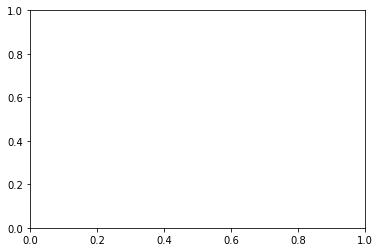

In [66]:
y2 = df_iris['cluster_id'].values
plot_decision_boundary(df_iris.iloc[:, [2, 3]].values, y2, kmeans)

plt.show()

In [62]:
y2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])